In [1]:
import numpy as np
import matplotlib.pyplot as plt

from twopbvp import two_p_BVP, get_f_vec
from beam import Beam
from sturmliouville import SL_solve

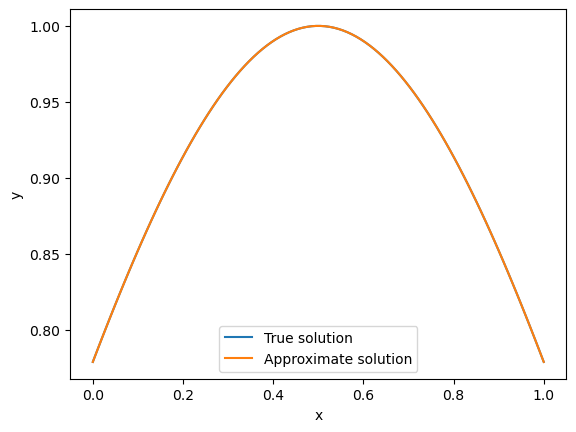

In [91]:
N = 100
L = 1
alpha = np.e**(-(0-1/2)**2)
beta = np.e**(-(L-1/2)**2)
f = lambda x: np.exp(-(x - 1/2)**2) * (4*(x - 1/2)**2 - 2)
x, y = two_p_BVP(*get_f_vec(f, L, N), alpha, beta)
g = lambda x: np.exp(-(x - 1/2)**2)
plt.plot(x, g(x))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['True solution','Approximate solution'])
plt.savefig("plots/task1.1_func.pdf")
plt.show()

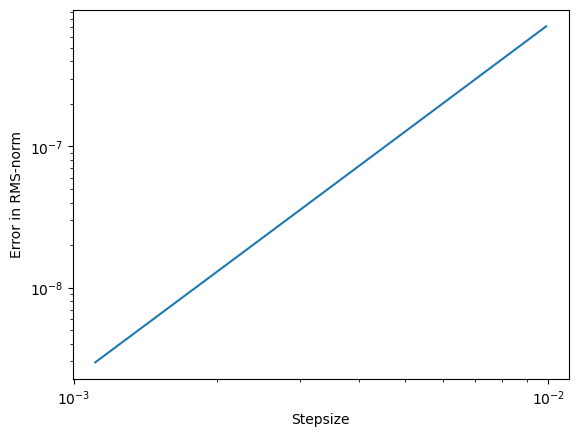

In [92]:
N = np.arange(100,1000,100)
L = 1
alpha = np.e**(-(0-1/2)**2)
beta = np.e**(-(L-1/2)**2)
RMS_error =  np.array([0.0]*np.size(N))
f = lambda x: np.exp(-(x - 1/2)**2) * (4*(x - 1/2)**2 - 2)
index = 0;
g = lambda x: np.exp(-(x - 1/2)**2)
for i in N:
    x, y = two_p_BVP(*get_f_vec(f, L, i), alpha, beta)
    error = np.abs(g(x) - y)
    RMS_error[index] = np.linalg.norm(error) / i
    index += 1
stepsize = L / (N + 1)
plt.loglog(stepsize, RMS_error)
#plt.loglog(stepsize, 0.0001*stepsize**2)
plt.xlabel('Stepsize')
plt.ylabel('Error in RMS-norm')
plt.savefig("plots/task1.1_error.pdf")
plt.show()

# Task 1.2

In [2]:
I = lambda x, L: 10**(-3) * (3 - 2 * np.cos(np.pi * x / L)**12) # m4
q = lambda x: -50 * 10**3 # N/m
L = 10 # m
E = 1.9 * 10**11 # N/m2
N = 999
beam = Beam(q, L, E, I)
x, u = beam.solve(N)

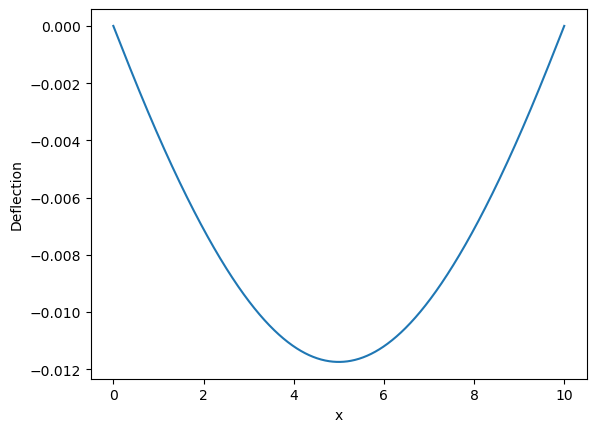

In [6]:
plt.plot(x, u)
plt.xlabel('x')
plt.ylabel('Deflection')
plt.savefig("plots/task1.2.pdf")
plt.show()
#plt.xlim(-1,1)

In [7]:
np.round(u[500], 8)

-0.01174106

# Task 2.1

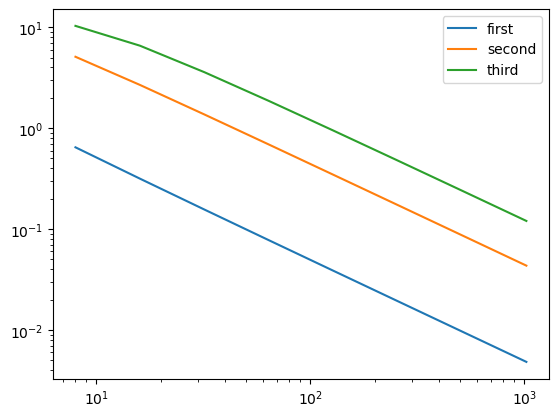

In [87]:
error1 = np.empty([8])
error2 = np.empty([8])
error3 = np.empty([8])

true_eig = lambda n: -(np.pi**2 / 4 + np.pi**2 * n + np.pi**2 * n**2)

true1 = true_eig(0)
true2 = true_eig(1)
true3 = true_eig(2)

for i in range(3,11):
    x, v, w = SL_solve(1, 2**i)
    error1[i - 3] = np.abs(true1 - w[0])
    error2[i - 3] = np.abs(true2 - w[1])
    error3[i - 3] = np.abs(true3 - w[2])

    
N = np.array([2**i for i in range(3,11)])
    
plt.loglog(N, error1)
plt.loglog(N, error2)
plt.loglog(N, error3)
plt.legend(['first', 'second', 'third'])

In [83]:
x, v, w = SL_solve(1, 499)
w = -np.abs(w)
np.round(w, 8)

array([ -2.47729835, -22.29553783, -61.93123128])

[ -2.51694411+0.j -22.64877103+0.j -62.89255718+0.j]


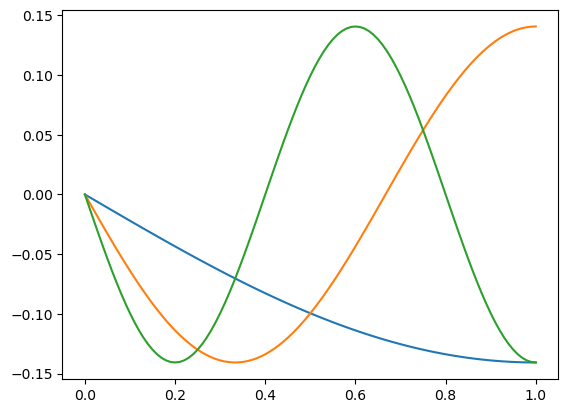

In [84]:
x, v, w = SL_solve(1, 100)

print(w)
plt.plot(x, v[:,0])
plt.plot(x, v[:,1])
plt.plot(x, v[:,2])
plt.show()

# Task 2.2